--------------------------------------------------------------------------------------------------
# **Bank Churn Prediction**
--------------------------------------------------------------------------------------------------

--------------------
## **Context**
--------------------

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

----------------------
## **Objective**
----------------------

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
The features included are: 

- **CustomerId:** Unique ID which is assigned to each customer

- **Surname:** Last name of the customer

- **CreditScore:**  It defines the credit history of the customer

- **Geography:**  A customer’s location   

- **Gender:**  It defines the Gender of the customer

- **Age:**  Age of the customer 

- **Tenure:**  Number of years for which the customer has been with the bank

- **NumOfProducts:**  It refers to the number of products that a customer has purchased through the bank.

- **Balance:**  Account balance

- **HasCrCard:**  It is a categorical variable that decides whether the customer has a credit card or not

- **EstimatedSalary:**   Estimated salary    

- **isActiveMember:**   It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )

- **Excited:**   It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
 
                    0=No ( Customer did not leave the bank )
                    1=Yes ( Customer left the bank )

  
 
   
    







                    

## **Loading the libraries and the dataset**

In [1]:
# Install dask in Google Colab
#!pip install dask-ml 

# Install Keras Tuner
#!pip install keras-tuner 

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot


# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import MinMaxScaler

# importing tensorflow
import tensorflow as tf

#To import different metrics 
from sklearn import metrics
import sklearn 
from tensorflow.keras import backend

# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

# To get classification report
from sklearn.metrics import classification_report

# To plot confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn import metrics

from keras.layers import BatchNormalization

#from scikeras.wrappers import KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

#Importing classback API
from keras import callbacks

# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#reading dataset
data = pd.read_csv('/content/drive/My Drive/Churn.csv')

## **Overview of Dataset**

In [5]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2853,2854,15648489,Ting,487,France,Male,53,4,199689.49,1,1,1,24207.86,1
8674,8675,15719426,Cole,529,France,Male,67,8,103101.56,2,1,1,154002.02,1
2445,2446,15654409,Unwin,665,France,Female,34,5,67816.72,1,1,1,29641.58,0
8949,8950,15649239,Vasilieva,731,Spain,Male,46,10,0.00,2,1,0,153015.42,0
9898,9899,15746569,Tsui,589,France,Male,38,4,0.00,1,1,0,95483.48,1


In [6]:
# Checking the number of rows and columns in the data
data.shape

(10000, 14)

In [7]:
# Let's check the datatypes of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 10,000  observations and 14 columns in the data.
* 3 columns are of the object datatype and 11 columns are numerical.

In [8]:
# Let's check for duplicate values in the data
data.duplicated().sum()

0

* No duplicate value in the dataset

In [9]:
# Let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

* There is no null value in the dataset.

In [10]:

#checking the percentage of each Exited column group in the dataset
(data.Exited.value_counts())/(data.Exited.count())

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [11]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* The credite score is distributed from 350 to 850 with the mean of 650.
* The age data has the min of 18 and the max of 92. 
* Maximum tenure is 10 and the min is 0; the mean is 5 years. 
* The minimum amount of balance is 0 but can not ne assumed as outlier. 
* The min estimated salary is 11.5 which is strange but can not be considered as outlier. 

In [12]:
# Let's check the number of unique values in each column
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [13]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


* The data are obtained from three countires. 
* The dustribution of genders is balanced to some how. 

### Data Pre-processing

In [14]:
df=data.copy()

In [15]:
df.drop(columns=["RowNumber","CustomerId", "Surname"], inplace=True)

* Before any processing on the data, a copy is made.
* Each value of the columns 'RowNumber' and 'CustomerId' are a unique identifier. Hence we can drop these columns as it will not add any predictive power or value to the model.
* The name of the customer also do not have any predictive power which can be dropped from the model.

## **Exploratory Data Analysis (EDA)**

### Univariate distribution

In [16]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

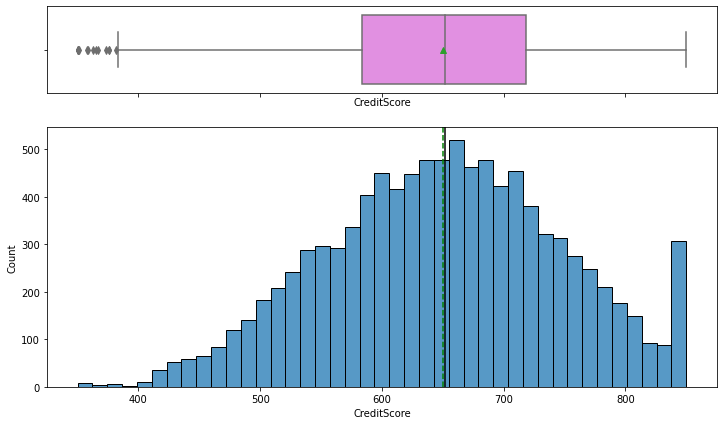

In [17]:
histogram_boxplot(df,'CreditScore')

* The mean and median of the CreditScore column is pretty close to each other.
* It seems that the data is processed because the upper limit is set to 850 and any number more than that is replaced by 850; Or the maximum number which is assigned by bank is 850.
* The data is mostly normaly distributed.

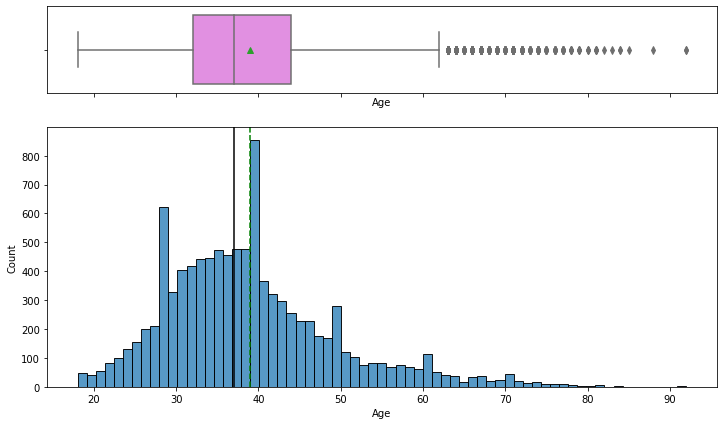

In [18]:
histogram_boxplot(df,'Age')

* The median of the age is 37 years old which the mean is 39 years old.
* The distribution is slightli skewed to the right. 

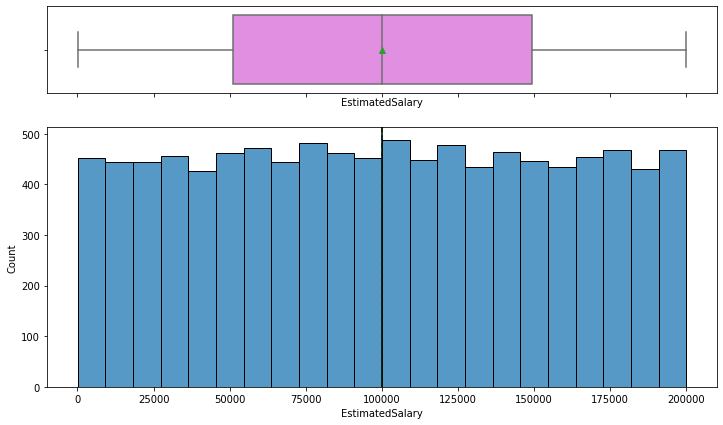

In [19]:
histogram_boxplot(df, 'EstimatedSalary')

* The 'EstimatedSalary' column is uniformly distributed.


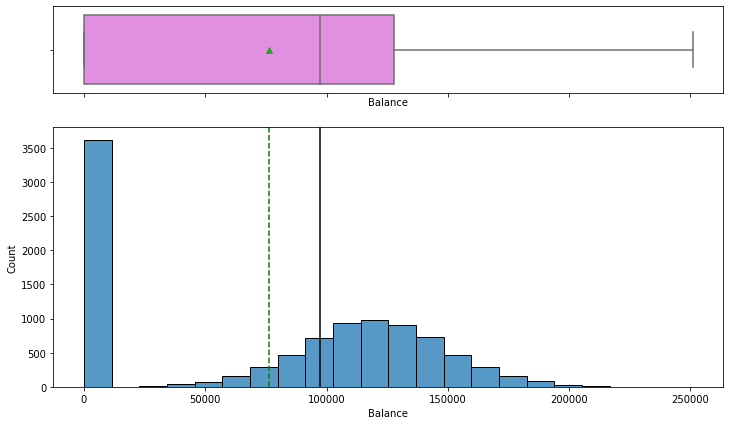

In [20]:
histogram_boxplot(df, 'Balance')

* There are lots of zeros in the data in 'balance' column. 
* The rest of data are normally distributed.

In [21]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

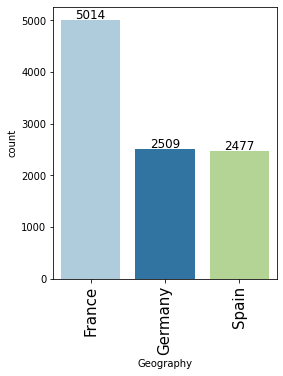

In [22]:
labeled_barplot(df, 'Geography')

* Geographycally, the data are belongs to three countries.
* Most of the data are from France. 
* Germany and Spain has the same amount of data.

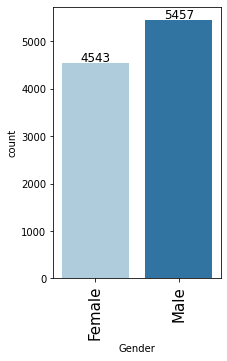

In [23]:
labeled_barplot(df,'Gender')

* The Male in gender distrubution is slighlt more than Female one.

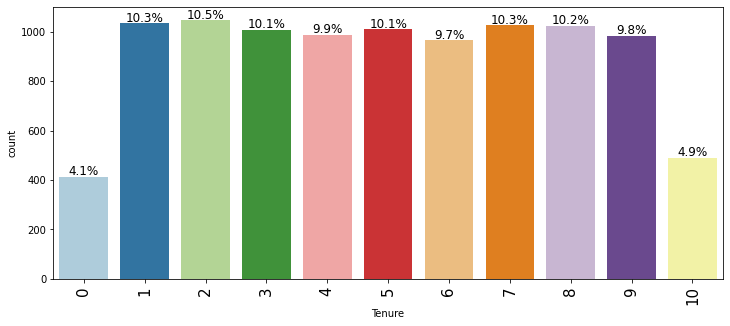

In [24]:
labeled_barplot(df,'Tenure', perc=True)

* Less than 5% of the customers have been with bank less than 1 year. 
* Less than 5% of the customers have been with bank more than 10 year. 
* The rest of the years are uniformly distributed. 

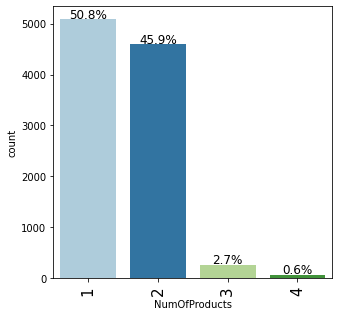

In [25]:
labeled_barplot(df, 'NumOfProducts', perc=True)

* Most of the customers (near 97%) has purchased one or two products through the bank.
* Less than 4 percent of customers purchased more than 2 products via the bank.

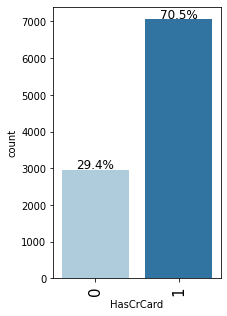

In [26]:
labeled_barplot(df, 'HasCrCard', perc=True)

* Near 70% of the customers have credit card of the bank.

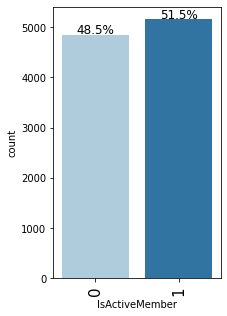

In [27]:
labeled_barplot(df, 'IsActiveMember', perc=True)

* Near half of the members are active and half are not active customers.

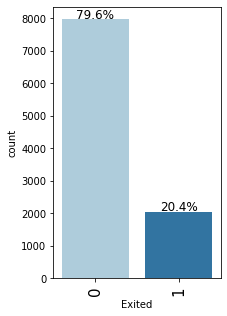

In [28]:
labeled_barplot(df, 'Exited', perc=True)

* Around 20% of the customers left the bank in six month.

0    7963
1    2037
Name: Exited, dtype: int64


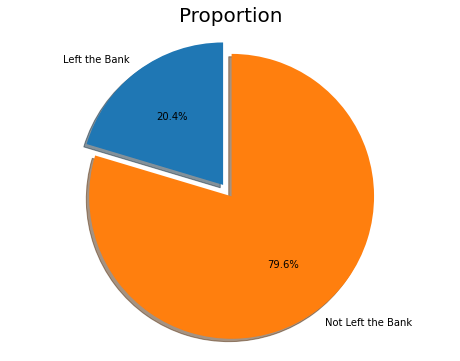

In [29]:
print(data.Exited.value_counts())
labels = 'Left the Bank', 'Not Left the Bank'
sizes = [data.Exited[data['Exited']==1].count(),data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

### Bivariate distribution

In [30]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

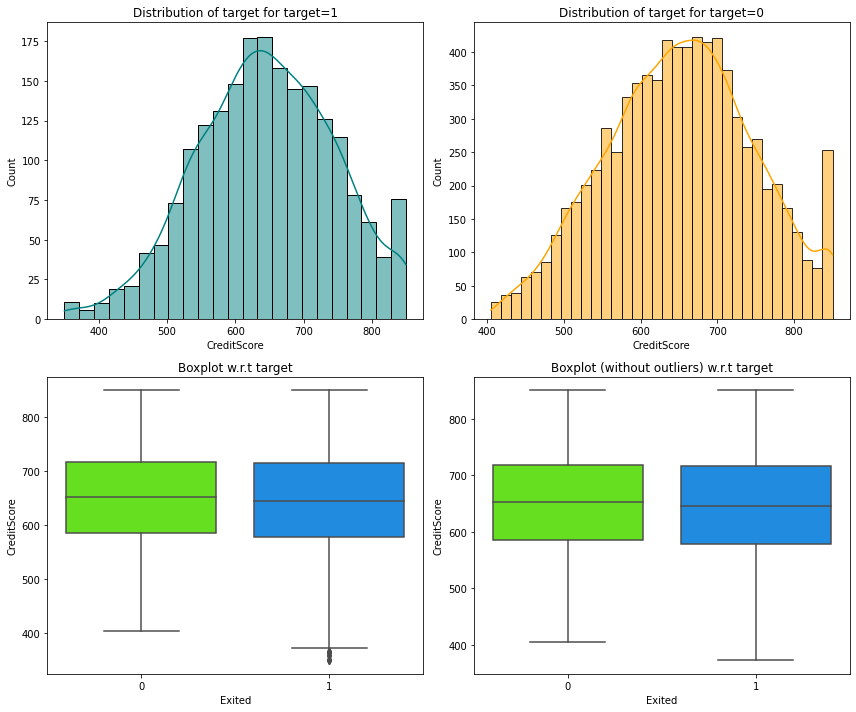

In [31]:
distribution_plot_wrt_target(df, 'CreditScore', 'Exited')

* Two graphs are more or less the same as each other.
* The credit score distribution are the same for the customers who left the bank and who were not.

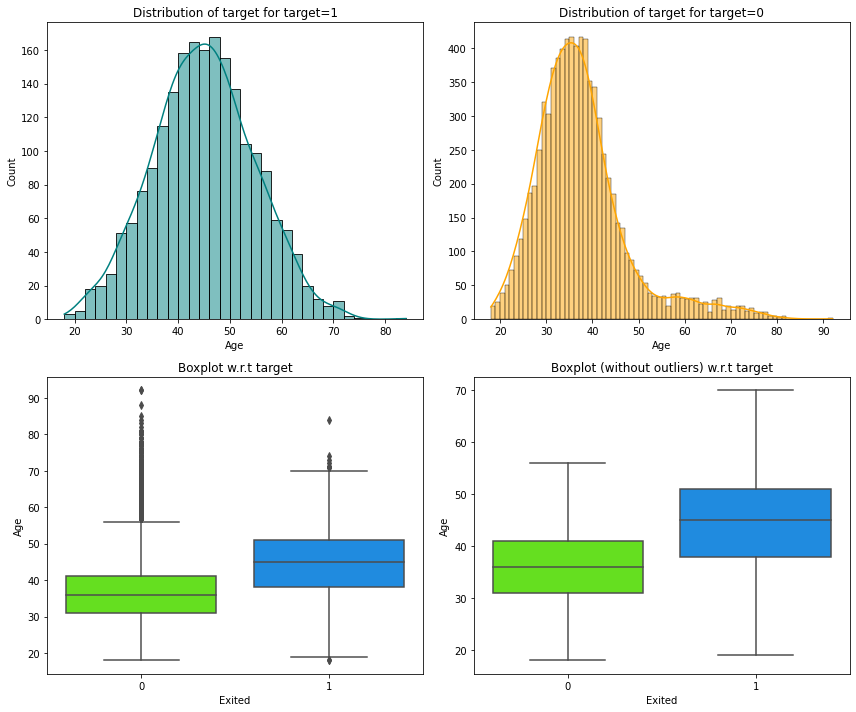

In [32]:
distribution_plot_wrt_target(df, 'Age', 'Exited')

* The distribution of the Age for the customers which left the bank are nirmal while for who not left the bank is right skewed.

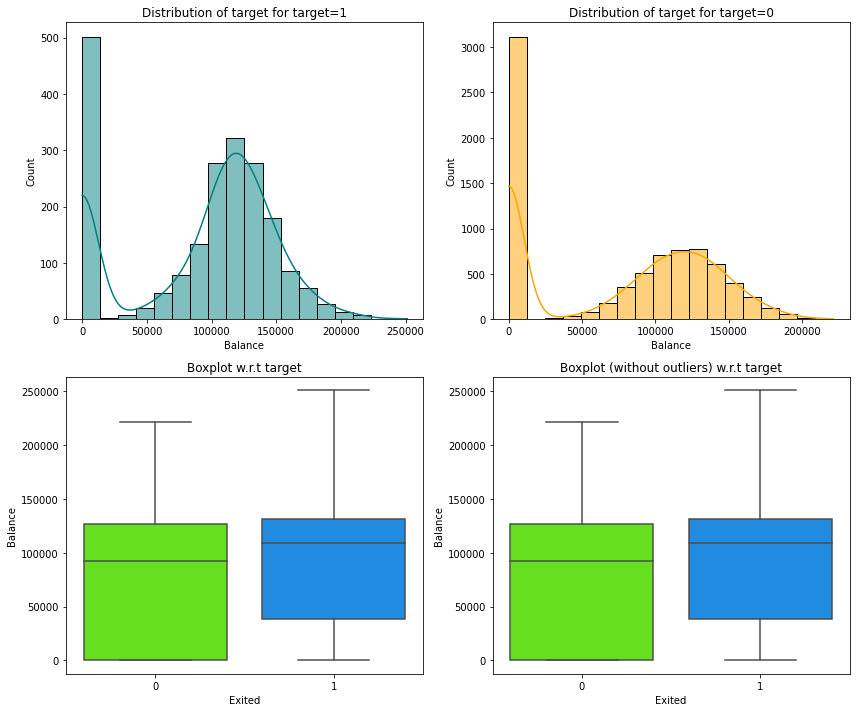

In [33]:
distribution_plot_wrt_target(df, 'Balance', 'Exited')

* The balance distribution are the same for the customers who left the bank and who were not.

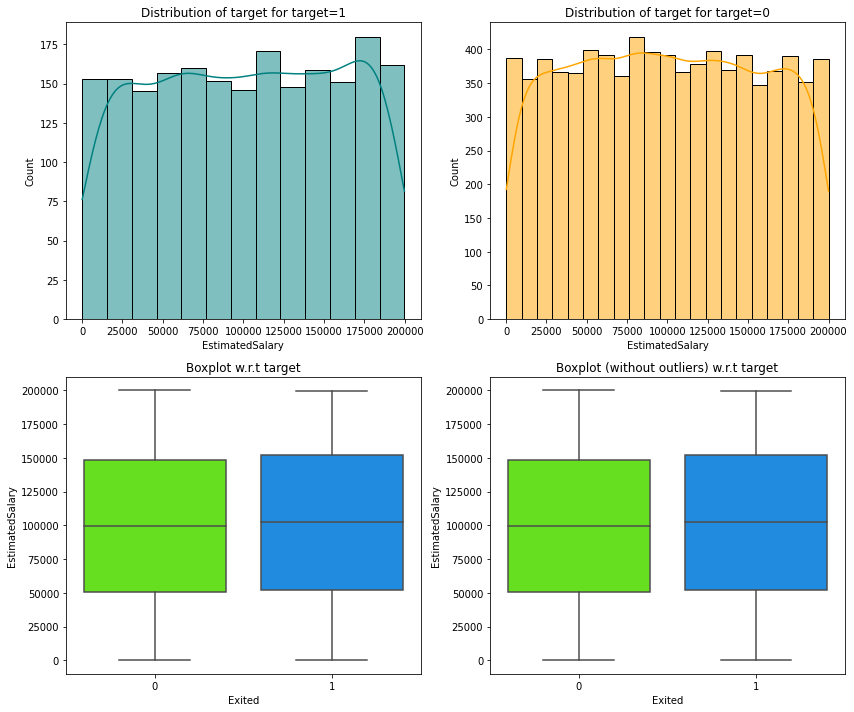

In [34]:
distribution_plot_wrt_target(df, 'EstimatedSalary', 'Exited')

* The estimated salary distribution are the same for the customers who left the bank and who were not.

In [35]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


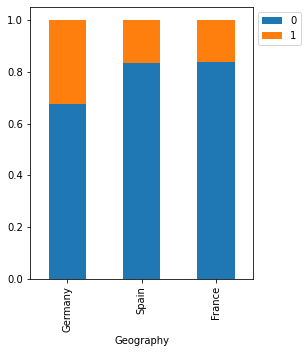

In [36]:
stacked_barplot(df, 'Geography', 'Exited' )

* Customers from Germany most likely to leave the bank.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


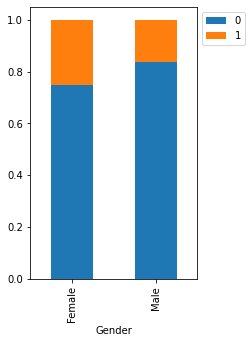

In [37]:
stacked_barplot(df, 'Gender', 'Exited' )

* Although the number of Male are more than Female, Female most likely to leave the bank wrt Male.

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


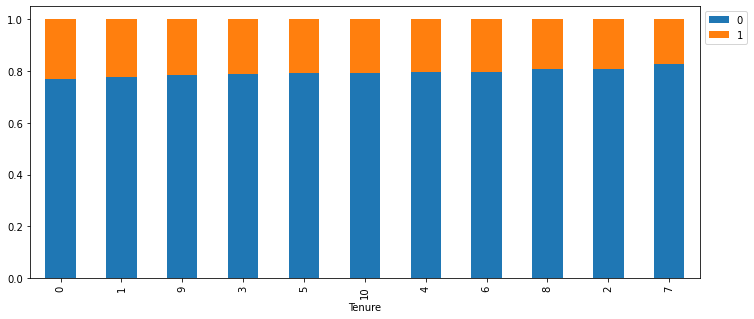

In [38]:
stacked_barplot(df, 'Tenure', 'Exited' )

* The new customers (less than 2 years with the bank) most likely to leave the bank wrt the others.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


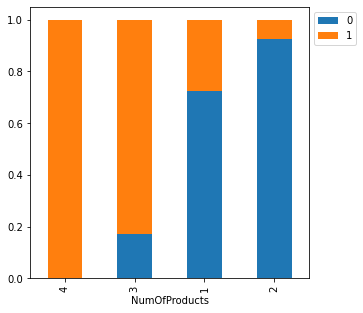

In [39]:
stacked_barplot(df, 'NumOfProducts', 'Exited' )

* Strangely all the customers which purchased 4 products through the bank, left the bank.
* Most of the customers which purchased 3 products through the bank, left it.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


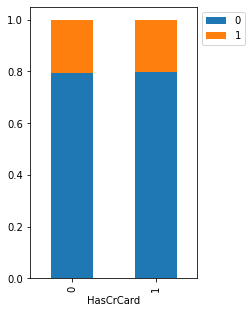

In [40]:
stacked_barplot(df, 'HasCrCard', 'Exited' )

* Having Credit card, has no effect to leave the bank.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


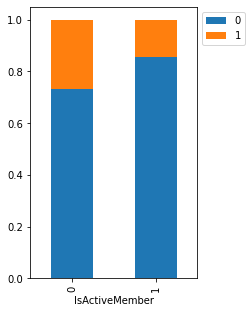

In [41]:
stacked_barplot(df, 'IsActiveMember', 'Exited' )

* Non avtive member most likely to leave the bank. 

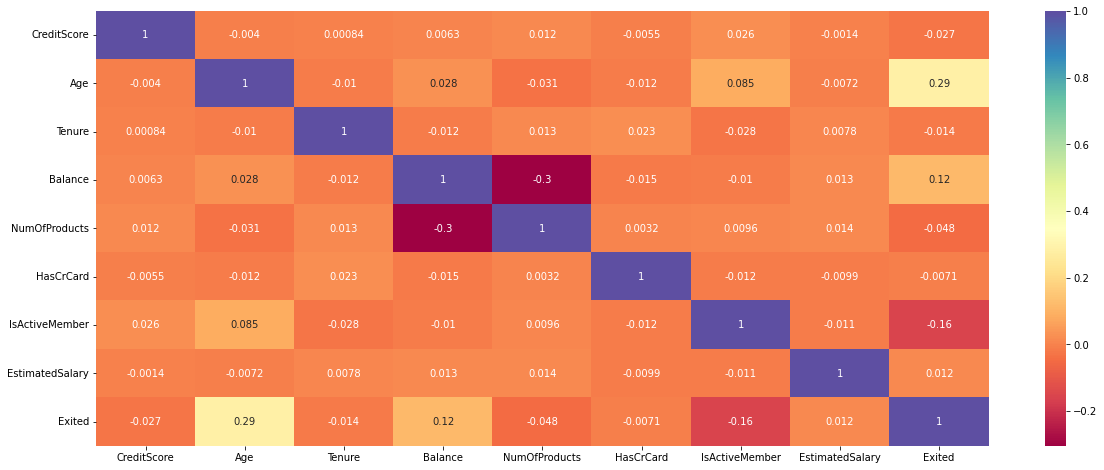

In [42]:
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(df.corr(),cmap="Spectral",ax=ax, annot=True)

* Balance and NumOfProducts has a negative correlation (around -30%)
* The Age has a positive correlation with Exited feature.

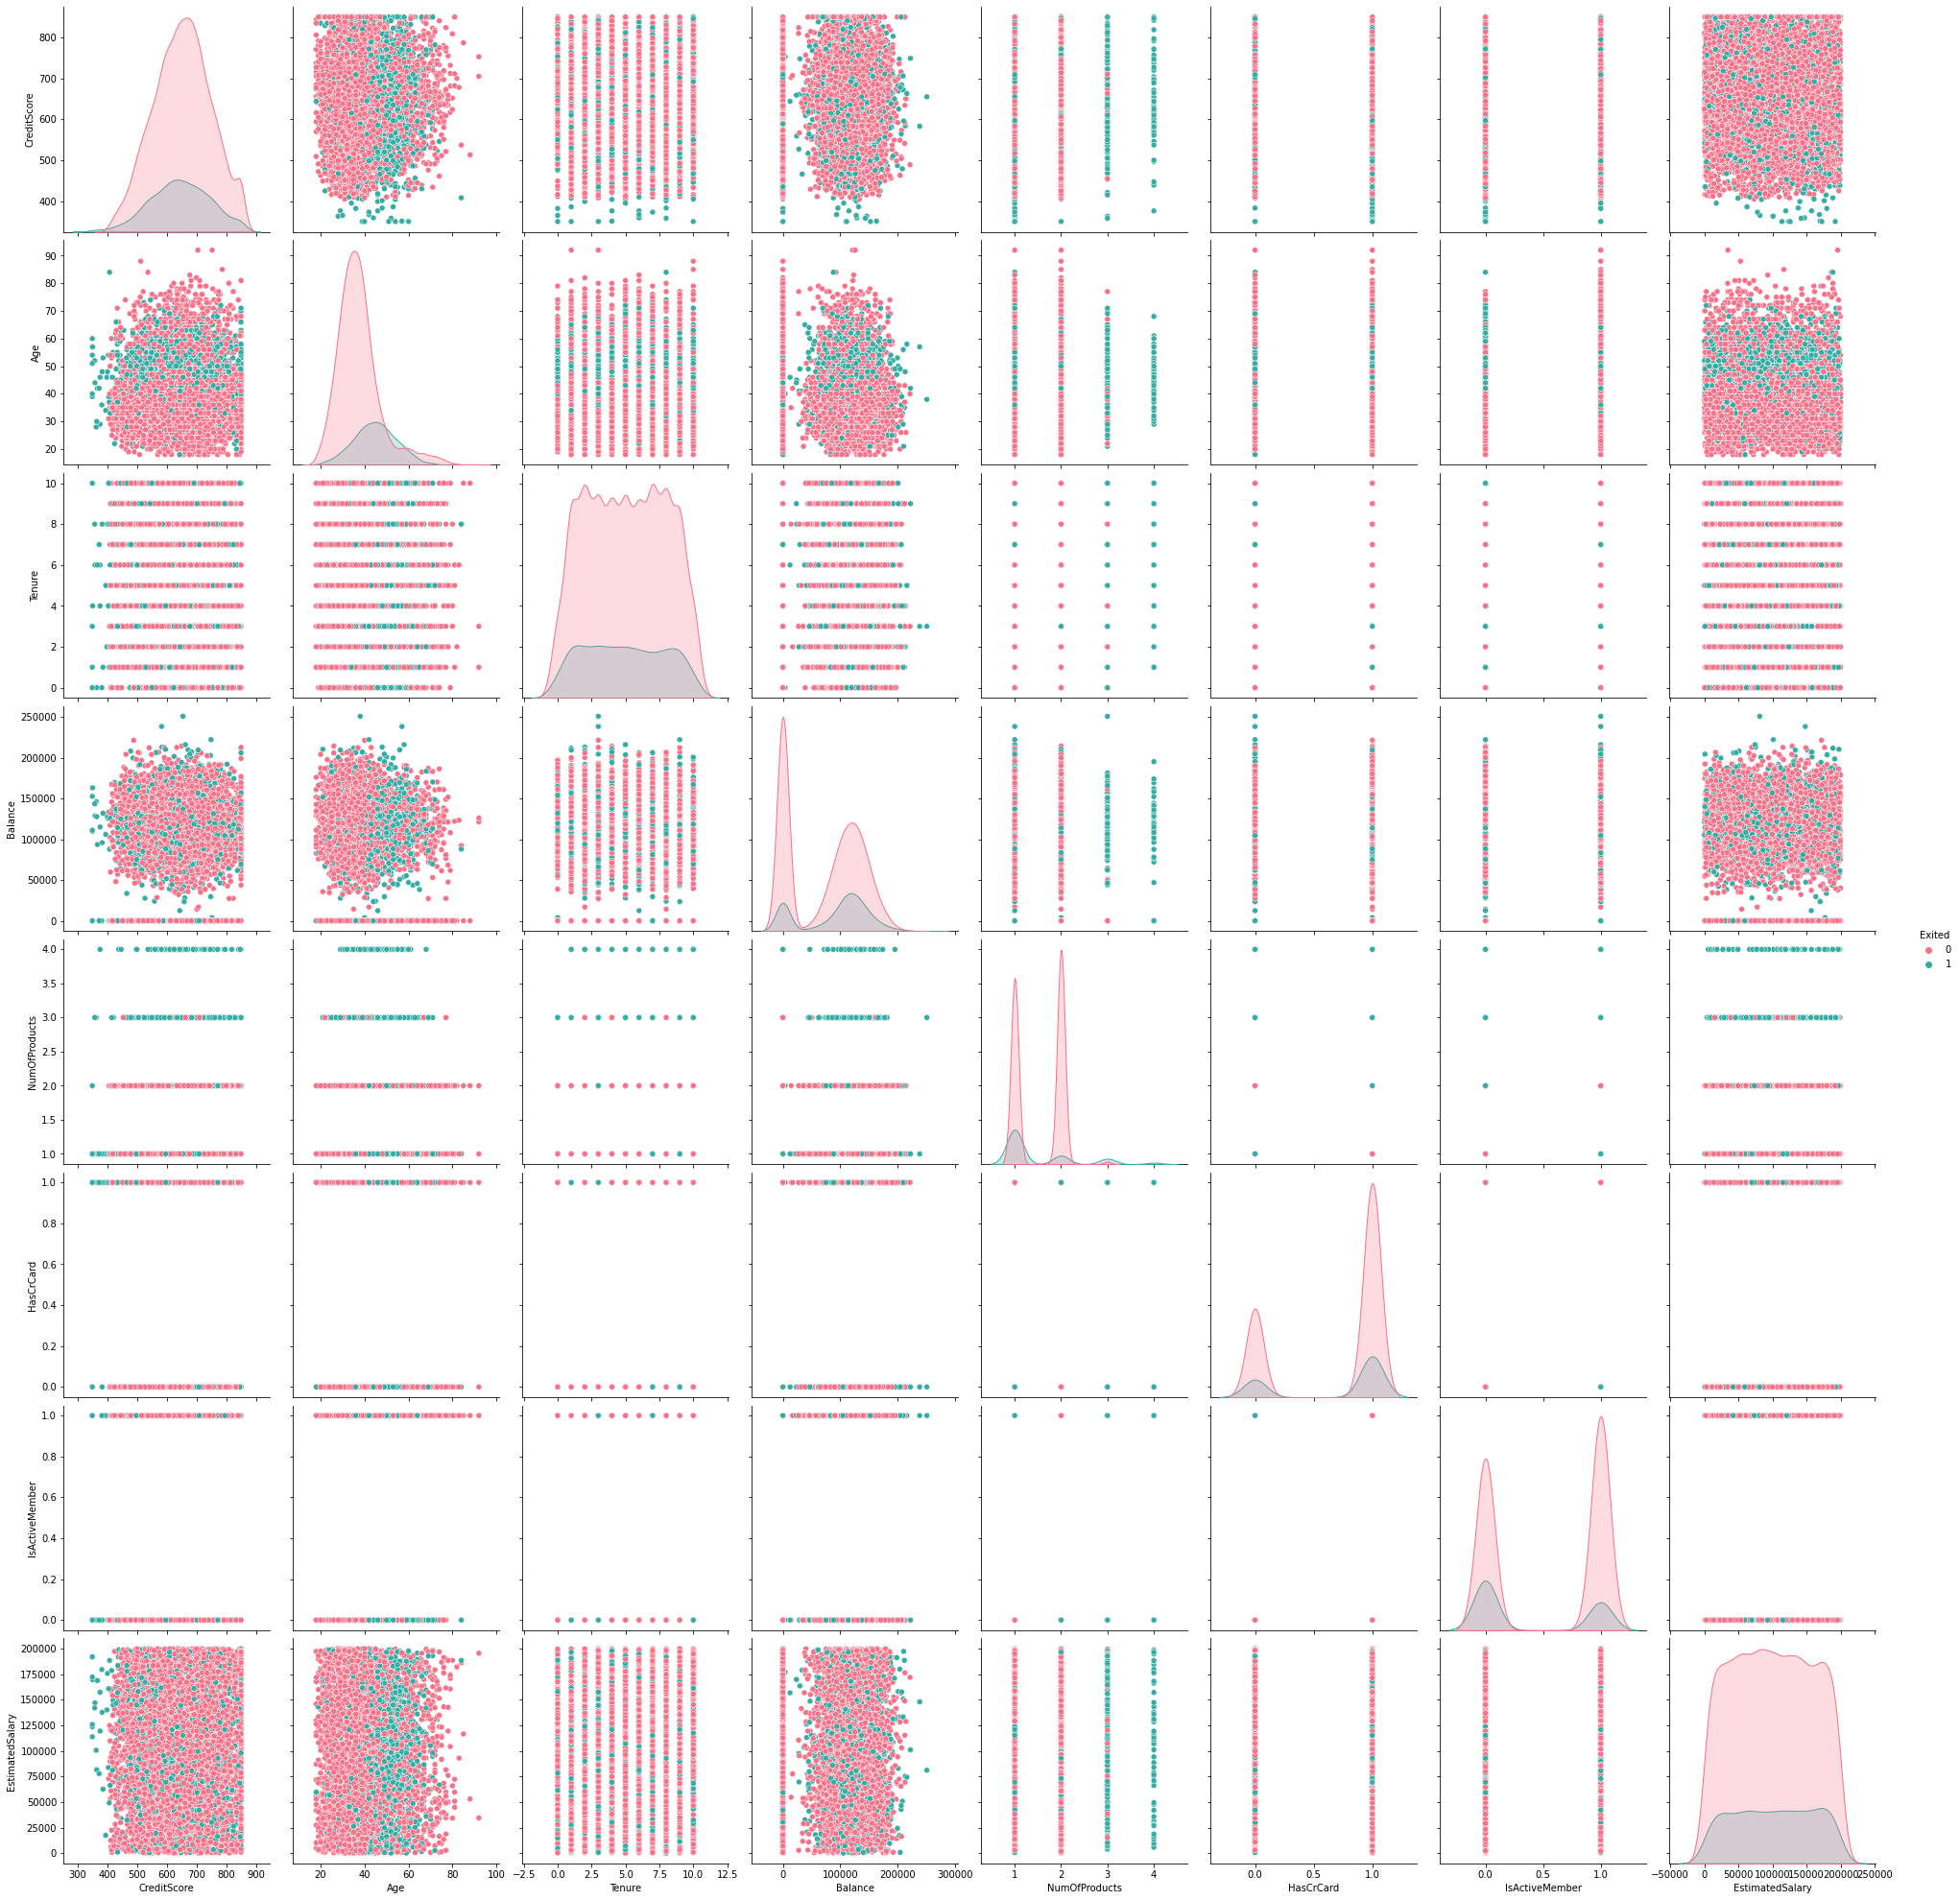

In [43]:
sns.pairplot(df,hue = 'Exited',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

* The customers in age between 40 to 70 are more probable to leave the bank.

## **Data Preparation**

This dataset contains both numerical and categorical variables. We need to treat them before we pass them onto the neural network. We will perform the below pre-processing steps: 
*   One hot encoding of categorical variables
*   Scaling numerical variables

An important point to remember: Before we scale numerical variables, we would first split the dataset into train and test datasets and perform scaling separately. Otherwise, we would be leaking information from the test data to the train data and the resulting model might give a false sense of good performance. This is known as **data leakage** which we would like to avoid.

In [44]:
## Separating Independent and Dependent Columns
X = df.drop(['Exited'],axis=1)
Y = df[['Exited']]

In [45]:
# Splitting the dataset into the Training and Testing set.
X_big, X_test, y_big, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 120, shuffle = True)

# Splitting the dataset into the Training and validation set.
X_train, X_val, y_train, y_val = train_test_split(X_big, y_big, test_size = 0.2, random_state = 120, shuffle = True)


### Encoding Categorical Columns

* We will be using the Label Encoding technique to encode the values of the categorical columns in this dataset.

In [46]:
X_train = pd.get_dummies(X_train,columns= ['Geography', 'Gender'],drop_first =True)
X_val = pd.get_dummies(X_val,columns= ['Geography', 'Gender'],drop_first =True)
X_test = pd.get_dummies(X_test,columns= ['Geography', 'Gender'],drop_first =True)

In [47]:
sc=MinMaxScaler()
CScore = sc.fit(X_train[["CreditScore"]])
X_train[["CreditScore"]] = CScore.transform(X_train[["CreditScore"]])
X_val[["CreditScore"]] = CScore.transform(X_val[["CreditScore"]])
X_test[["CreditScore"]] = CScore.transform(X_test[["CreditScore"]])

Age = sc.fit(X_train[["Age"]])
X_train[["Age"]] = Age.transform(X_train[["Age"]])
X_val[["Age"]] = Age.transform(X_val[["Age"]])
X_test[["Age"]] = Age.transform(X_test[["Age"]])

balan = sc.fit(X_train[["Balance"]])
X_train[["Balance"]] = balan.transform(X_train[["Balance"]])
X_val[["Balance"]] = balan.transform(X_val[["Balance"]])
X_test[["Balance"]] = balan.transform(X_test[["Balance"]])

Esalary = sc.fit(X_train[["EstimatedSalary"]])
X_train[["EstimatedSalary"]] = Esalary.transform(X_train[["EstimatedSalary"]])
X_val[["EstimatedSalary"]] = Esalary.transform(X_val[["EstimatedSalary"]])
X_test[["EstimatedSalary"]] = Esalary.transform(X_test[["EstimatedSalary"]])

In [48]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(6400, 11)
(1600, 11)
(2000, 11)
(6400, 1)
(1600, 1)
(2000, 1)


## **Model Building**

### A model can make wrong predictions in the following ways:

* Predicting a customer is leaving the bank, when he/she is not. 
* Predicting a customer is not leaving the bank, when he/she is in fact leaving.

### Which case is more important?

* The second case, when the model predicts that the customer will not leave but actually he/she is going to leave, is more important and bank might lose a good customer. 

#### How to reduce this loss i.e need to reduce False Negatives?

* Since FN error is important for us to minimize, the bank would want the Recall Score evaluation metric to be maximized. Hence, the focus should be on increasing the Recall score.

In [49]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

* The above function is used for plot of confusion matrix during after modeling in this part.

## **Model 1**

**A simple model, ROC-AUC curve is used to improve the threshold parameter.** 

In [50]:
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(120)

import random
random.seed(120)
tf.random.set_seed(120)

In [51]:
# Initializing the ANN
model1 = Sequential()

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model1.add(Dense(activation = 'relu', input_dim = 11, units=64))

#Add hidden layer
model1.add(Dense(32, activation='relu'))

# we have an output of 1 node
# We use the sigmoid because we want probability outcomes
model1.add(Dense(1, activation = 'sigmoid')) 

In [52]:
# Create optimizer with default learning rate
# Compile the model
model1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [54]:
history1=model1.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
160/160 [==============================] - 1s 5ms/step - loss: 0.5231 - accuracy: 0.7928 - val_loss: 0.5010 - val_accuracy: 0.7945
Epoch 2/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4980 - accuracy: 0.7934 - val_loss: 0.4911 - val_accuracy: 0.7945
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4895 - accuracy: 0.7934 - val_loss: 0.4838 - val_accuracy: 0.7945
Epoch 4/50
160/160 [==============================] - 1s 3ms/step - loss: 0.4836 - accuracy: 0.7934 - val_loss: 0.4799 - val_accuracy: 0.7945
Epoch 5/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4794 - accuracy: 0.7934 - val_loss: 0.4781 - val_accuracy: 0.7945
Epoch 6/50
160/160 [==============================] - 1s 3ms/step - loss: 0.4761 - accuracy: 0.7943 - val_loss: 0.4736 - val_accuracy: 0.7953
Epoch 7/50
160/160 [==============================] - 1s 3ms/step - loss: 0.4723 - accuracy: 0.7941 - val_loss: 0.4782 - val_accuracy: 0.8023
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8331


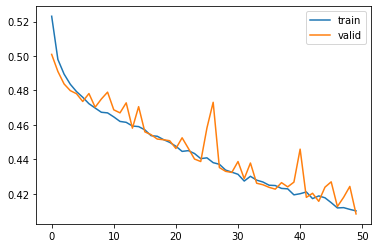

In [55]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history1.history)
hist['epoch'] = history1.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model1.evaluate(X_val, y_val)

In [56]:
y_pred=model1.predict(X_val)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

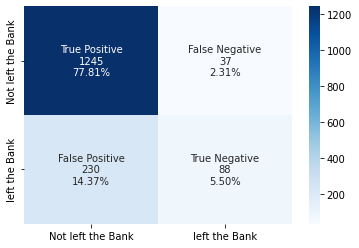

In [57]:
#Calculating the confusion matrix 
cm=confusion_matrix(y_val, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not left the Bank','left the Bank']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Here, the 2.80% of False Negatives is because we gave 0.5 as the threshold to the model, and as this is an imbalanced dataset, we should calculate the threshold using the AUC-ROC curve. 

1) **Imbalanced dataset**: As you have seen in the EDA, this dataset is imbalanced, and it contains more examples that belong to the **0** class.

2) **Decision Threshold**: Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction.


Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

Best Threshold=0.211841, G-Mean=0.731


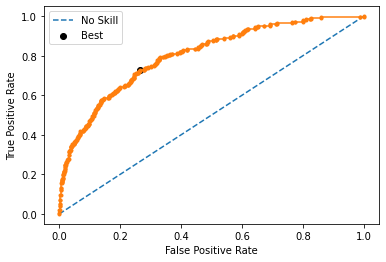

In [58]:
# predict probabilities
yhat1 = model1.predict(X_val)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_val, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [59]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_val)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

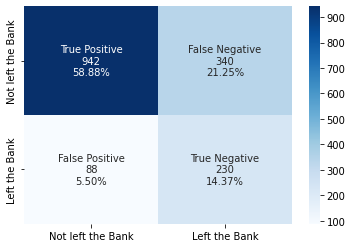

In [60]:
#Calculating the confusion matrix 
cm1=confusion_matrix(y_val, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not left the Bank','Left the Bank']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [61]:
#Accuracy as per the classification report 
cr=metrics.classification_report(y_val,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1282
           1       0.40      0.72      0.52       318

    accuracy                           0.73      1600
   macro avg       0.66      0.73      0.67      1600
weighted avg       0.81      0.73      0.76      1600



## **Model 2**

**Number of hidden layers and nodes are increased wrt Model 1**

**The optimizer changed from SGD to Adam** 


In [62]:
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(120)

import random
random.seed(120)
tf.random.set_seed(120)

In [63]:
# Initializing the ANN
model2 = Sequential()

#Adding hidden layer
model2.add(Dense(256, activation = 'relu', kernel_initializer='he_uniform', input_dim = 11))
model2.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model2.add(Dense(64, activation = 'relu', kernel_initializer='he_uniform'))
model2.add(Dense(32, activation = 'relu', kernel_initializer='he_uniform'))

# we have an output of 1 node
# We use the sigmoid because we want probability outcomes
model2.add(Dense(1, activation = 'sigmoid')) 

#Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])



In [64]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,337
Trainable params: 46,337
Non-trainable params: 0
_________________________________________________________________


In [65]:
history2=model2.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=64,verbose=1)

Epoch 1/50
80/80 [==============================] - 1s 9ms/step - loss: 0.5064 - accuracy: 0.7924 - val_loss: 0.4864 - val_accuracy: 0.7914
Epoch 2/50
80/80 [==============================] - 0s 6ms/step - loss: 0.4738 - accuracy: 0.8008 - val_loss: 0.4559 - val_accuracy: 0.7898
Epoch 3/50
80/80 [==============================] - 0s 6ms/step - loss: 0.4505 - accuracy: 0.8055 - val_loss: 0.4426 - val_accuracy: 0.8023
Epoch 4/50
80/80 [==============================] - 1s 6ms/step - loss: 0.4298 - accuracy: 0.8176 - val_loss: 0.4233 - val_accuracy: 0.8203
Epoch 5/50
80/80 [==============================] - 0s 6ms/step - loss: 0.4182 - accuracy: 0.8215 - val_loss: 0.4385 - val_accuracy: 0.8180
Epoch 6/50
80/80 [==============================] - 0s 6ms/step - loss: 0.4004 - accuracy: 0.8301 - val_loss: 0.4080 - val_accuracy: 0.8266
Epoch 7/50
80/80 [==============================] - 0s 6ms/step - loss: 0.3973 - accuracy: 0.8285 - val_loss: 0.4155 - val_accuracy: 0.8336
Epoch 8/50
80/80 [==

50/50 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8556


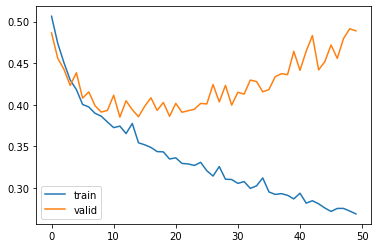

In [66]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history2.history)
hist['epoch'] = history2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model2.evaluate(X_val, y_val)

Best Threshold=0.193936, G-Mean=0.752


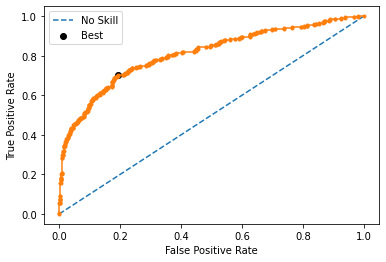

In [67]:
# predict probabilities
yhat2 = model2.predict(X_val)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_val, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [68]:
#Predicting the results using best as a threshold
y_pred_e2=model2.predict(X_val)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

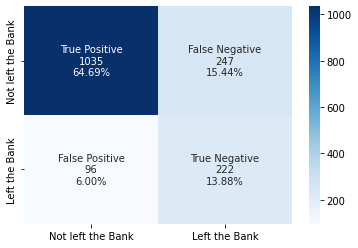

In [69]:
#Calculating the confusion matrix 
cm2=confusion_matrix(y_val, y_pred_e2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not left the Bank','Left the Bank']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [70]:
#Accuracy as per the classification report 
cr=metrics.classification_report(y_val,y_pred_e2)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1282
           1       0.47      0.70      0.56       318

    accuracy                           0.79      1600
   macro avg       0.69      0.75      0.71      1600
weighted avg       0.83      0.79      0.80      1600



## **Model2-1** 
* Callback on Model2

In [71]:
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(120)

import random
random.seed(120)
tf.random.set_seed(120)

In [72]:
# Initializing the ANN
model2_1 = Sequential()

#Adding hidden layer
model2_1.add(Dense(256, activation = 'relu', kernel_initializer='he_uniform', input_dim = 11))
model2_1.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model2_1.add(Dense(64, activation = 'relu', kernel_initializer='he_uniform'))
model2_1.add(Dense(32, activation = 'relu', kernel_initializer='he_uniform'))

# we have an output of 1 node
# We use the sigmoid because we want probability outcomes
model2_1.add(Dense(1, activation = 'sigmoid')) 

#Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model2_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [73]:
model2_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,337
Trainable params: 46,337
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history2_1 = model2_1.fit(X_train, y_train, validation_split=0.2 , epochs=50,callbacks=es_cb)

Epoch 1/50
160/160 [==============================] - 3s 6ms/step - loss: 0.4961 - accuracy: 0.7967 - val_loss: 0.4596 - val_accuracy: 0.7883
Epoch 2/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4563 - accuracy: 0.8100 - val_loss: 0.4635 - val_accuracy: 0.8070
Epoch 3/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4413 - accuracy: 0.8102 - val_loss: 0.4176 - val_accuracy: 0.8117
Epoch 4/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4220 - accuracy: 0.8254 - val_loss: 0.4080 - val_accuracy: 0.8242
Epoch 5/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4042 - accuracy: 0.8260 - val_loss: 0.3977 - val_accuracy: 0.8305
Epoch 6/50
160/160 [==============================] - 1s 5ms/step - loss: 0.3881 - accuracy: 0.8297 - val_loss: 0.3870 - val_accuracy: 0.8391
Epoch 7/50
160/160 [==============================] - 1s 6ms/step - loss: 0.3864 - accuracy: 0.8342 - val_loss: 0.3946 - val_accuracy: 0.8453
Epoch 

50/50 [==============================] - 0s 3ms/step - loss: 0.3759 - accuracy: 0.8444


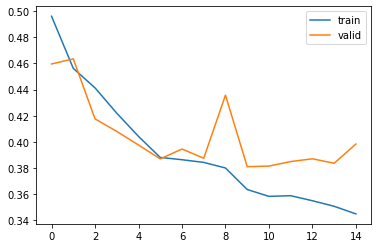

In [75]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history2_1.history)
hist['epoch'] = history2_1.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model2_1.evaluate(X_val, y_val)

Best Threshold=0.193936, G-Mean=0.752


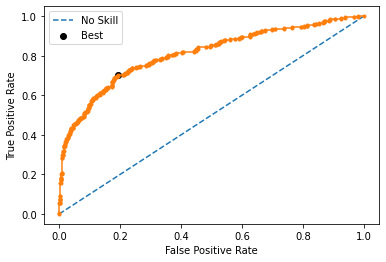

In [76]:
# predict probabilities
yhat2_1 = model2.predict(X_val)
# keep probabilities for the positive outcome only
yhat2_1 = yhat2_1[:, 0]
# calculate roc curves
fpr, tpr, thresholds2_1 = roc_curve(y_val, yhat2_1)
# calculate the g-mean for each threshold
gmeans2_1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2_1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2_1[ix], gmeans2_1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [77]:
#Predicting the results using best as a threshold
y_pred_e2_1=model2_1.predict(X_val)
y_pred_e2_1 = (y_pred_e2_1 > thresholds2_1[ix])
y_pred_e2_1

array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

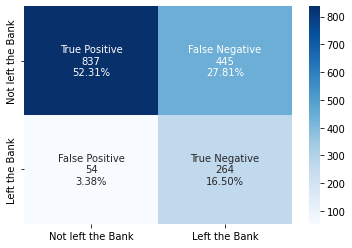

In [78]:
#Calculating the confusion matrix 
cm2_1=confusion_matrix(y_val, y_pred_e2_1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not left the Bank','Left the Bank']
make_confusion_matrix(cm2_1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [79]:
#Accuracy as per the classification report 
cr=metrics.classification_report(y_val,y_pred_e2_1)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.65      0.77      1282
           1       0.37      0.83      0.51       318

    accuracy                           0.69      1600
   macro avg       0.66      0.74      0.64      1600
weighted avg       0.83      0.69      0.72      1600



## **Model 3**

**BatchNormalization is applied on Model 2**

In [80]:
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(120)

import random
random.seed(120)
tf.random.set_seed(120)

In [81]:
# Initializing the ANN
model3 = Sequential()

#Adding hidden layer
model3.add(Dense(256, activation = 'relu', kernel_initializer='he_uniform', input_dim = 11))
model3.add(BatchNormalization())
model3.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dense(64, activation = 'relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dense(32, activation = 'relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())

# we have an output of 1 node
# We use the sigmoid because we want probability outcomes
model3.add(Dense(1, activation = 'sigmoid')) 

#Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])



In [82]:
#Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [83]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               2

In [84]:
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

history3=model3.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=64,verbose=1, callbacks=es_cb)

Epoch 1/50
80/80 [==============================] - 2s 11ms/step - loss: 0.6007 - accuracy: 0.6938 - val_loss: 0.7377 - val_accuracy: 0.5031
Epoch 2/50
80/80 [==============================] - 1s 7ms/step - loss: 0.4585 - accuracy: 0.8111 - val_loss: 0.5240 - val_accuracy: 0.7680
Epoch 3/50
80/80 [==============================] - 1s 7ms/step - loss: 0.3955 - accuracy: 0.8383 - val_loss: 0.4088 - val_accuracy: 0.8344
Epoch 4/50
80/80 [==============================] - 1s 8ms/step - loss: 0.3688 - accuracy: 0.8471 - val_loss: 0.3907 - val_accuracy: 0.8352
Epoch 5/50
80/80 [==============================] - 1s 7ms/step - loss: 0.3562 - accuracy: 0.8492 - val_loss: 0.3797 - val_accuracy: 0.8461
Epoch 6/50
80/80 [==============================] - 1s 7ms/step - loss: 0.3495 - accuracy: 0.8502 - val_loss: 0.3746 - val_accuracy: 0.8492
Epoch 7/50
80/80 [==============================] - 1s 7ms/step - loss: 0.3425 - accuracy: 0.8562 - val_loss: 0.4026 - val_accuracy: 0.8391
Epoch 8/50
80/80 [=

50/50 [==============================] - 0s 4ms/step - loss: 0.3814 - accuracy: 0.8575


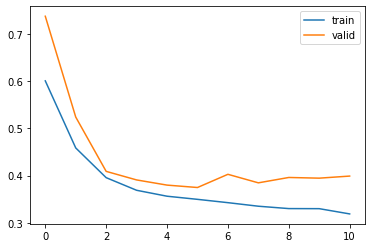

In [85]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history3.history)
hist['epoch'] = history3.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model3.evaluate(X_val, y_val)

Best Threshold=0.153351, G-Mean=0.758


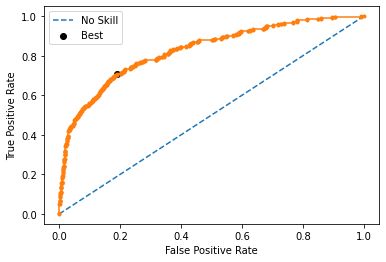

In [86]:
# predict probabilities
yhat3 = model3.predict(X_val)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_val, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [87]:
#Predicting the results using best as a threshold
y_pred_e3=model3.predict(X_val)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

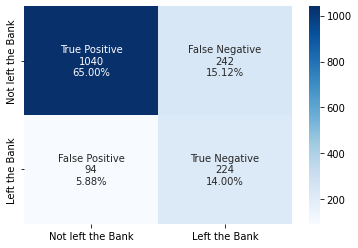

In [88]:
#Calculating the confusion matrix 
cm3=confusion_matrix(y_val, y_pred_e3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not left the Bank','Left the Bank']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [89]:
#Accuracy as per the classification report 
cr=metrics.classification_report(y_val,y_pred_e3)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1282
           1       0.48      0.70      0.57       318

    accuracy                           0.79      1600
   macro avg       0.70      0.76      0.72      1600
weighted avg       0.83      0.79      0.80      1600



## **Model 4**

**Dropout Technique**

In [90]:
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(120)

import random
random.seed(120)
tf.random.set_seed(120)

In [91]:
# Initializing the ANN
model4 = Sequential()

#Adding hidden layer
model4.add(Dense(256, activation = 'relu', kernel_initializer='he_uniform', input_dim = 11))
model4.add(Dropout(0.3))
model4.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.3))
model4.add(Dense(64, activation = 'relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.3))
model4.add(Dense(32, activation = 'relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.3))

# we have an output of 1 node
# We use the sigmoid because we want probability outcomes
model4.add(Dense(1, activation = 'sigmoid')) 

#Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])



In [92]:
#Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [93]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [94]:
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

history4=model4.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=64,verbose=1, callbacks=es_cb)

Epoch 1/50
80/80 [==============================] - 2s 10ms/step - loss: 0.6808 - accuracy: 0.7348 - val_loss: 0.5535 - val_accuracy: 0.7945
Epoch 2/50
80/80 [==============================] - 1s 6ms/step - loss: 0.5473 - accuracy: 0.7818 - val_loss: 0.5323 - val_accuracy: 0.7945
Epoch 3/50
80/80 [==============================] - 1s 6ms/step - loss: 0.5270 - accuracy: 0.7871 - val_loss: 0.5055 - val_accuracy: 0.7945
Epoch 4/50
80/80 [==============================] - 1s 6ms/step - loss: 0.5179 - accuracy: 0.7896 - val_loss: 0.5140 - val_accuracy: 0.7945
Epoch 5/50
80/80 [==============================] - 1s 6ms/step - loss: 0.5150 - accuracy: 0.7928 - val_loss: 0.5064 - val_accuracy: 0.7945
Epoch 6/50
80/80 [==============================] - 0s 6ms/step - loss: 0.5008 - accuracy: 0.7922 - val_loss: 0.4862 - val_accuracy: 0.7945
Epoch 7/50
80/80 [==============================] - 1s 7ms/step - loss: 0.4999 - accuracy: 0.7930 - val_loss: 0.4969 - val_accuracy: 0.7945
Epoch 8/50
80/80 [=

50/50 [==============================] - 0s 3ms/step - loss: 0.3821 - accuracy: 0.8431


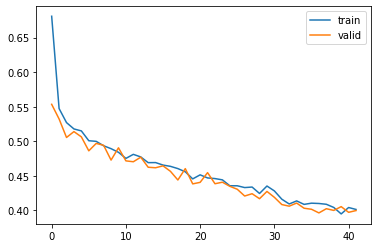

In [95]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history4.history)
hist['epoch'] = history4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model4.evaluate(X_val, y_val)

Best Threshold=0.237810, G-Mean=0.743


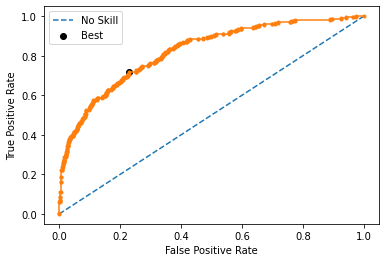

In [96]:
# predict probabilities
yhat4 = model4.predict(X_val)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_val, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [97]:
#Predicting the results using best as a threshold
y_pred_e4=model4.predict(X_val)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

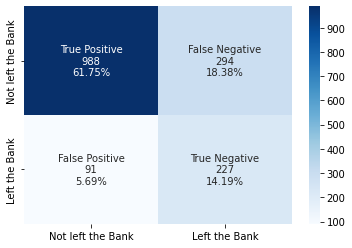

In [98]:
#Calculating the confusion matrix 
cm4=confusion_matrix(y_val, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not left the Bank','Left the Bank']
make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [99]:
#Accuracy as per the classification report 
cr=metrics.classification_report(y_val,y_pred_e4)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1282
           1       0.44      0.71      0.54       318

    accuracy                           0.76      1600
   macro avg       0.68      0.74      0.69      1600
weighted avg       0.82      0.76      0.78      1600



## **Model 5**

**Random Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:
* Type of Architecture
* Number of Layers
* Number of Neurons in a layer
* Regularization hyperparameters
* Learning Rate
* Type of Optimizer
* Dropout Rate

In [100]:
backend.clear_session()
np.random.seed(120)
import random
random.seed(120)
tf.random.set_seed(120)

In [101]:
def create_model_v5(lr,batch_size):  
    np.random.seed(120)
    model = Sequential()
    model.add(Dense(256, activation = 'relu', kernel_initializer='he_uniform', input_dim = 11))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['Recall'])
    return model



In [102]:
#!pip install scikeras[tensorflow]

In [103]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)

# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [104]:
%%time
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

#Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


160/160 [==============================] - 2s 8ms/step - loss: 0.5857 - recall: 0.0293 - val_loss: 0.5265 - val_recall: 0.0000e+00
Best: nan using {'lr': 0.01, 'batch_size': 32}
CPU times: user 3.43 s, sys: 296 ms, total: 3.73 s
Wall time: 59.8 s


The best model has the following configuration: 

( It may vary each time the code runs )

**Result of Grid Search**

{'batch_size': 32, 'learning_rate": 0.01}

Let's create a model with the above mentioned configuration

In [105]:
model5=create_model_v5(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [106]:
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
model5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history5=model5.fit(X_train, y_train, epochs=50, batch_size = random_result.best_params_['batch_size'], verbose=1,validation_split=0.2, callbacks=es_cb)

Epoch 1/50
160/160 [==============================] - 2s 7ms/step - loss: 0.6188 - accuracy: 0.7785 - val_loss: 0.5017 - val_accuracy: 0.7945
Epoch 2/50
160/160 [==============================] - 1s 5ms/step - loss: 0.5102 - accuracy: 0.7934 - val_loss: 0.4816 - val_accuracy: 0.7945
Epoch 3/50
160/160 [==============================] - 1s 6ms/step - loss: 0.4908 - accuracy: 0.7937 - val_loss: 0.4759 - val_accuracy: 0.7945
Epoch 4/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4861 - accuracy: 0.7937 - val_loss: 0.4623 - val_accuracy: 0.7969
Epoch 5/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4741 - accuracy: 0.7932 - val_loss: 0.4482 - val_accuracy: 0.7977
Epoch 6/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4619 - accuracy: 0.8016 - val_loss: 0.4378 - val_accuracy: 0.7961
Epoch 7/50
160/160 [==============================] - 1s 6ms/step - loss: 0.4610 - accuracy: 0.7969 - val_loss: 0.4633 - val_accuracy: 0.8078
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8506


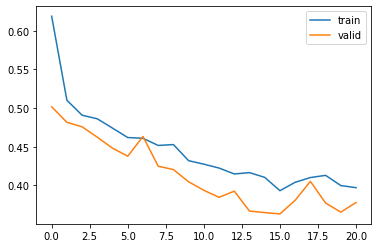

In [107]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history5.history)
hist['epoch'] = history5.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model5.evaluate(X_val, y_val)

Best Threshold=0.174503, G-Mean=0.730


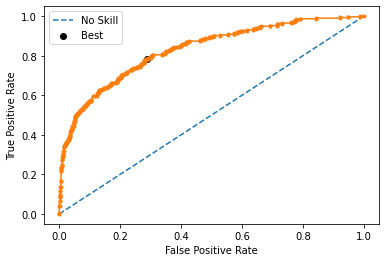

In [108]:
# predict probabilities
yhat5 = model5.predict(X_val)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_val, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [109]:
#Predicting the results using best as a threshold
y_pred_e5=model5.predict(X_val)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

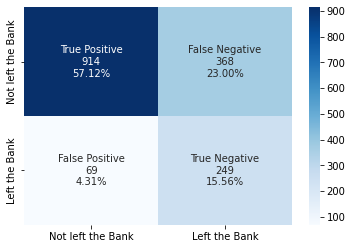

In [110]:
#Calculating the confusion matrix 
cm5=confusion_matrix(y_val, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not left the Bank','Left the Bank']
make_confusion_matrix(cm5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [111]:
#Accuracy as per the classification report 
cr=metrics.classification_report(y_val,y_pred_e5)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1282
           1       0.40      0.78      0.53       318

    accuracy                           0.73      1600
   macro avg       0.67      0.75      0.67      1600
weighted avg       0.83      0.73      0.75      1600



## **Model 6**

**Grid Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:
* Type of Architecture
* Number of Layers
* Number of Neurons in a layer
* Regularization hyperparameters
* Learning Rate
* Type of Optimizer
* Dropout Rate

In [112]:
backend.clear_session()
np.random.seed(120)
import random
random.seed(120)
tf.random.set_seed(120)

In [113]:
def create_model_v6(lr,batch_size):  
    np.random.seed(120)
    model = Sequential()
    model.add(Dense(256, activation = 'relu', kernel_initializer='he_uniform', input_dim = 11))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['Recall'])
    return model

In [114]:

keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)

# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid= GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [115]:
%%time
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

#Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


160/160 [==============================] - 3s 11ms/step - loss: 0.5857 - recall: 0.0293 - val_loss: 0.5265 - val_recall: 0.0000e+00
Best: nan using {'batch_size': 32, 'lr': 0.01}
CPU times: user 3.9 s, sys: 155 ms, total: 4.05 s
Wall time: 53.1 s


In [116]:
model6=create_model_v6(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [117]:
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
model6.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history6=model6.fit(X_train, y_train, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2, callbacks=es_cb)

Epoch 1/50
160/160 [==============================] - 2s 7ms/step - loss: 0.6188 - accuracy: 0.7785 - val_loss: 0.5017 - val_accuracy: 0.7945
Epoch 2/50
160/160 [==============================] - 1s 5ms/step - loss: 0.5102 - accuracy: 0.7934 - val_loss: 0.4816 - val_accuracy: 0.7945
Epoch 3/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4908 - accuracy: 0.7937 - val_loss: 0.4759 - val_accuracy: 0.7945
Epoch 4/50
160/160 [==============================] - 1s 6ms/step - loss: 0.4861 - accuracy: 0.7937 - val_loss: 0.4623 - val_accuracy: 0.7969
Epoch 5/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4741 - accuracy: 0.7932 - val_loss: 0.4482 - val_accuracy: 0.7977
Epoch 6/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4619 - accuracy: 0.8016 - val_loss: 0.4378 - val_accuracy: 0.7961
Epoch 7/50
160/160 [==============================] - 1s 6ms/step - loss: 0.4610 - accuracy: 0.7969 - val_loss: 0.4633 - val_accuracy: 0.8078
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8506


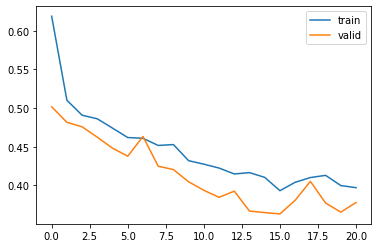

In [118]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history6.history)
hist['epoch'] = history6.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model6.evaluate(X_val, y_val)

Best Threshold=0.174503, G-Mean=0.749


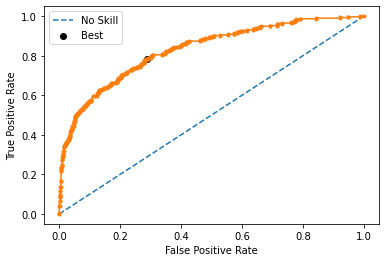

In [119]:
# predict probabilities
yhat6 = model6.predict(X_val)
# keep probabilities for the positive outcome only
yhat6 = yhat6[:, 0]
# calculate roc curves
fpr, tpr, thresholds6 = roc_curve(y_val, yhat6)
# calculate the g-mean for each threshold
gmeans6 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans6)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds6[ix], gmeans6[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [120]:
#Predicting the results using best as a threshold
y_pred_e6=model6.predict(X_val)
y_pred_e6 = (y_pred_e6 > thresholds6[ix])
y_pred_e6

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

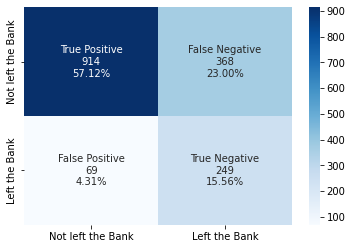

In [121]:
#Calculating the confusion matrix 
cm6=confusion_matrix(y_val, y_pred_e6)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not left the Bank','Left the Bank']
make_confusion_matrix(cm6, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [122]:
#Accuracy as per the classification report 
cr=metrics.classification_report(y_val,y_pred_e6)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1282
           1       0.40      0.78      0.53       318

    accuracy                           0.73      1600
   macro avg       0.67      0.75      0.67      1600
weighted avg       0.83      0.73      0.75      1600



## **Model 7**
**Dask**

* Another library called Dask used to provide a performance boost to Hyperparameter Tuning due to its parallelized computing procedure. 
* Dask also has the option of implementing Grid Search similar to the Grid Search in Scikit-learn.

In [123]:
backend.clear_session()
np.random.seed(120)
import random
random.seed(120)
tf.random.set_seed(120)

In [124]:
def create_model_v7(lr,batch_size):  
    np.random.seed(120)
    model = Sequential()
    model.add(Dense(256, activation = 'relu', kernel_initializer='he_uniform', input_dim = 11))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform', input_dim = 11))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [125]:

keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)

# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
dask= DaskGridSearchCV(estimator=keras_estimator,  
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [126]:
%%time
dask_result = dask.fit(X_train, y_train,validation_split=0.2,verbose=1) 

#Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

160/160 [==============================] - 2s 7ms/step - loss: 0.5951 - accuracy: 0.7826 - val_loss: 0.5220 - val_accuracy: 0.7945
Best: 0.793594 using {'batch_size': 32, 'lr': 0.01}
CPU times: user 1min 13s, sys: 4.5 s, total: 1min 18s
Wall time: 1min 3s


In [127]:
model7=create_model_v7(batch_size=dask_result.best_params_['batch_size'],lr=dask_result.best_params_['lr'])

model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [128]:
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

optimizer = tf.keras.optimizers.Adam(dask_result.best_params_['lr'])
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history7=model7.fit(X_train, y_train, epochs=50, batch_size = dask_result.best_params_['batch_size'], verbose=1,validation_split=0.2, callbacks=es_cb)

Epoch 1/50
160/160 [==============================] - 2s 7ms/step - loss: 0.5975 - accuracy: 0.7770 - val_loss: 0.5307 - val_accuracy: 0.7945
Epoch 2/50
160/160 [==============================] - 1s 5ms/step - loss: 0.5149 - accuracy: 0.7928 - val_loss: 0.4866 - val_accuracy: 0.7945
Epoch 3/50
160/160 [==============================] - 1s 5ms/step - loss: 0.5019 - accuracy: 0.7941 - val_loss: 0.4909 - val_accuracy: 0.7945
Epoch 4/50
160/160 [==============================] - 1s 6ms/step - loss: 0.4871 - accuracy: 0.7947 - val_loss: 0.4686 - val_accuracy: 0.7945
Epoch 5/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4789 - accuracy: 0.7943 - val_loss: 0.4655 - val_accuracy: 0.7961
Epoch 6/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4597 - accuracy: 0.8004 - val_loss: 0.4373 - val_accuracy: 0.8109
Epoch 7/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4410 - accuracy: 0.8109 - val_loss: 0.4035 - val_accuracy: 0.8281
Epoch 

50/50 [==============================] - 0s 3ms/step - loss: 0.3680 - accuracy: 0.8425


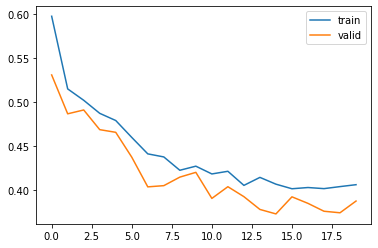

In [129]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history7.history)
hist['epoch'] = history7.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model7.evaluate(X_val, y_val)

Best Threshold=0.157568, G-Mean=0.770


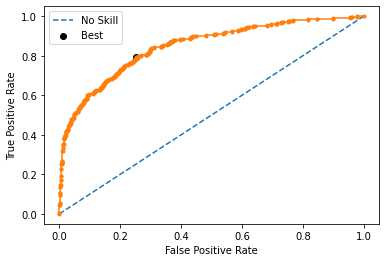

In [130]:
# predict probabilities
yhat7 = model7.predict(X_val)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_val, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [131]:
#Predicting the results using best as a threshold
y_pred_e7=model7.predict(X_val)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

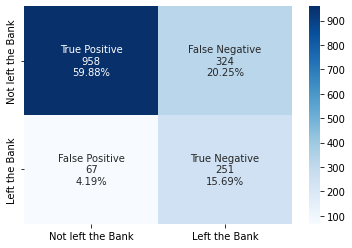

In [132]:
#Calculating the confusion matrix 
cm7=confusion_matrix(y_val, y_pred_e7)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not left the Bank','Left the Bank']
make_confusion_matrix(cm7, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [133]:
#Accuracy as per the classification report 
cr=metrics.classification_report(y_val,y_pred_e7)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1282
           1       0.44      0.79      0.56       318

    accuracy                           0.76      1600
   macro avg       0.69      0.77      0.70      1600
weighted avg       0.84      0.76      0.78      1600



* Since the dataset dimensions and hyperparameter number/range were small for this example, Dask couldn't show a significant improvement.

## **Model 8**
**Keras Tuner**

In [134]:
backend.clear_session()
np.random.seed(120)
import random
random.seed(120)
tf.random.set_seed(120)

**Hyperparameters**
* How many hidden layers should the model have?
* How many neurons should the model have in each hidden layer?
* Learning Rate

In [135]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.

In [136]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Bank_')

INFO:tensorflow:Reloading Oracle from existing project ./Bank_/oracle.json
INFO:tensorflow:Reloading Tuner from ./Bank_/tuner0.json


In [137]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [138]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [139]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Bank_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 6
units_0: 192
units_1: 96
learning_rate: 0.001
units_2: 128
units_3: 128
units_4: 32
units_5: 192
units_6: 128
Score: 0.8486979206403097
Trial summary
Hyperparameters:
num_layers: 7
units_0: 160
units_1: 256
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
Score: 0.8442708253860474
Trial summary
Hyperparameters:
num_layers: 8
units_0: 96
units_1: 192
learning_rate: 0.001
units_2: 224
units_3: 192
units_4: 128
units_5: 32
units_6: 32
units_7: 224
units_8: 192
Score: 0.8393229246139526
Trial summary
Hyperparameters:
num_layers: 2
units_0: 64
units_1: 96
learning_rate: 0.001
Score: 0.8197916746139526
Trial summary
Hyperparameters:
num_layers: 9
units_0: 32
units_1: 64
learning_rate: 0.0001
units_2: 32
units_3: 96
units_4: 96
units_5: 64
units_6: 192
units_7: 32
units_8: 32
Score: 0.7958333293596903


In [140]:
backend.clear_session()
np.random.seed(120)
import random
random.seed(120)
tf.random.set_seed(120)

In [141]:
np.random.seed(120)
model8 = Sequential()
model8.add(Dense(160, activation = 'relu', kernel_initializer='he_uniform', input_dim = 11))
model8.add(Dense(256, activation = 'relu', kernel_initializer='he_uniform'))
model8.add(Dense(32, activation = 'relu', kernel_initializer='he_uniform'))
model8.add(Dense(32, activation = 'relu', kernel_initializer='he_uniform'))
model8.add(Dense(32, activation = 'relu', kernel_initializer='he_uniform'))
model8.add(Dense(32, activation = 'relu', kernel_initializer='he_uniform'))
model8.add(Dense(32, activation = 'relu', kernel_initializer='he_uniform'))
model8.add(Dense(1, activation='sigmoid'))


In [142]:
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1920      
                                                                 
 dense_1 (Dense)             (None, 256)               41216     
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1

In [143]:

#Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model8.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [144]:
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

history8=model8.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=64,verbose=1, callbacks=es_cb)

Epoch 1/50
80/80 [==============================] - 1s 8ms/step - loss: 0.5245 - accuracy: 0.7752 - val_loss: 0.4863 - val_accuracy: 0.7859
Epoch 2/50
80/80 [==============================] - 0s 6ms/step - loss: 0.4768 - accuracy: 0.7986 - val_loss: 0.4520 - val_accuracy: 0.7992
Epoch 3/50
80/80 [==============================] - 0s 5ms/step - loss: 0.4497 - accuracy: 0.8080 - val_loss: 0.4316 - val_accuracy: 0.8062
Epoch 4/50
80/80 [==============================] - 0s 6ms/step - loss: 0.4331 - accuracy: 0.8172 - val_loss: 0.4168 - val_accuracy: 0.8148
Epoch 5/50
80/80 [==============================] - 1s 6ms/step - loss: 0.4149 - accuracy: 0.8242 - val_loss: 0.4206 - val_accuracy: 0.8125
Epoch 6/50
80/80 [==============================] - 1s 6ms/step - loss: 0.4027 - accuracy: 0.8242 - val_loss: 0.3973 - val_accuracy: 0.8352
Epoch 7/50
80/80 [==============================] - 1s 7ms/step - loss: 0.4066 - accuracy: 0.8264 - val_loss: 0.4055 - val_accuracy: 0.8234
Epoch 8/50
80/80 [==

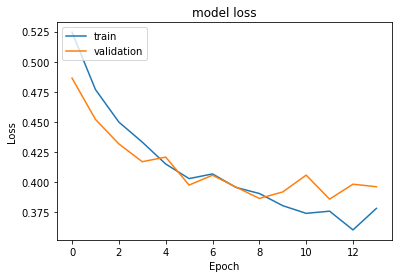

In [145]:
#Plotting Train Loss vs Validation Loss
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.178583, G-Mean=0.764


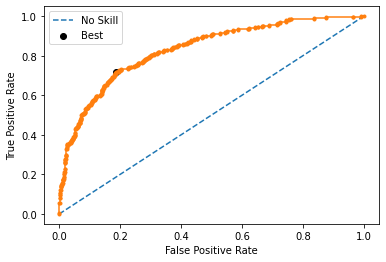

In [146]:
# predict probabilities
yhat8 = model8.predict(X_val)
# keep probabilities for the positive outcome only
yhat8 = yhat8[:, 0]
# calculate roc curves
fpr, tpr, thresholds8 = roc_curve(y_val, yhat8)
# calculate the g-mean for each threshold
gmeans8 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans8)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds8[ix], gmeans8[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [147]:
#Predicting the results using best as a threshold
y_pred_e8=model8.predict(X_val)
y_pred_e8 = (y_pred_e8 > thresholds8[ix])
y_pred_e8

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

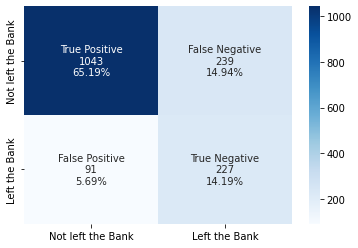

In [148]:
#Calculating the confusion matrix 
cm8=confusion_matrix(y_val, y_pred_e8)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not left the Bank','Left the Bank']
make_confusion_matrix(cm8, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [149]:
#Accuracy as per the classification report 
cr=metrics.classification_report(y_val,y_pred_e8)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1282
           1       0.49      0.71      0.58       318

    accuracy                           0.79      1600
   macro avg       0.70      0.76      0.72      1600
weighted avg       0.83      0.79      0.81      1600



## **Model 9**
**SMOTE + Keras Tuner**

In [150]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [151]:
print(X_train.shape)
print(y_train.shape)
print(X_sm.shape)
print(y_sm.shape)

(6400, 11)
(6400, 1)
(10158, 11)
(10158, 1)


In [152]:
backend.clear_session()
np.random.seed(120)
import random
random.seed(120)
tf.random.set_seed(120)

In [153]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [154]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Bank_')

INFO:tensorflow:Reloading Oracle from existing project ./Bank_/oracle.json
INFO:tensorflow:Reloading Tuner from ./Bank_/tuner0.json


In [155]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [156]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [157]:
tuner_2.results_summary()

Results summary
Results in ./Bank_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 6
units_0: 192
units_1: 96
learning_rate: 0.001
units_2: 128
units_3: 128
units_4: 32
units_5: 192
units_6: 128
Score: 0.8486979206403097
Trial summary
Hyperparameters:
num_layers: 7
units_0: 160
units_1: 256
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
Score: 0.8442708253860474
Trial summary
Hyperparameters:
num_layers: 8
units_0: 96
units_1: 192
learning_rate: 0.001
units_2: 224
units_3: 192
units_4: 128
units_5: 32
units_6: 32
units_7: 224
units_8: 192
Score: 0.8393229246139526
Trial summary
Hyperparameters:
num_layers: 2
units_0: 64
units_1: 96
learning_rate: 0.001
Score: 0.8197916746139526
Trial summary
Hyperparameters:
num_layers: 9
units_0: 32
units_1: 64
learning_rate: 0.0001
units_2: 32
units_3: 96
units_4: 96
units_5: 64
units_6: 192
units_7: 32
units_8: 32
Score: 0.7958333293596903


In [158]:
backend.clear_session()
np.random.seed(120)
import random
random.seed(120)
tf.random.set_seed(120)

In [159]:
np.random.seed(120)
model9 = Sequential()
model9.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform', input_dim = 11))
model9.add(Dense(64, activation = 'relu', kernel_initializer='he_uniform'))
model9.add(Dense(32, activation = 'relu', kernel_initializer='he_uniform'))
model9.add(Dense(224, activation = 'relu', kernel_initializer='he_uniform'))
model9.add(Dense(160, activation = 'relu', kernel_initializer='he_uniform'))
model9.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model9.add(Dense(224, activation = 'relu', kernel_initializer='he_uniform'))
model9.add(Dense(256, activation = 'relu', kernel_initializer='he_uniform'))
model9.add(Dense(1, activation='sigmoid'))


In [160]:
model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 224)               7392      
                                                                 
 dense_4 (Dense)             (None, 160)               36000     
                                                                 
 dense_5 (Dense)             (None, 128)               20608     
                                                                 
 dense_6 (Dense)             (None, 224)               2

In [161]:

#Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [162]:
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

history9=model9.fit(X_sm, y_sm ,           
          validation_split=0.2,
          epochs=50,
          batch_size=64,verbose=1, callbacks=es_cb)

Epoch 1/50
127/127 [==============================] - 3s 12ms/step - loss: 0.6137 - accuracy: 0.6751 - val_loss: 0.6705 - val_accuracy: 0.6181
Epoch 2/50
127/127 [==============================] - 1s 9ms/step - loss: 0.5479 - accuracy: 0.7218 - val_loss: 0.5089 - val_accuracy: 0.7618
Epoch 3/50
127/127 [==============================] - 1s 10ms/step - loss: 0.5124 - accuracy: 0.7453 - val_loss: 0.9497 - val_accuracy: 0.3942
Epoch 4/50
127/127 [==============================] - 1s 9ms/step - loss: 0.4886 - accuracy: 0.7578 - val_loss: 0.5584 - val_accuracy: 0.6393
Epoch 5/50
127/127 [==============================] - 1s 9ms/step - loss: 0.4724 - accuracy: 0.7699 - val_loss: 0.5772 - val_accuracy: 0.6747
Epoch 6/50
127/127 [==============================] - 1s 9ms/step - loss: 0.4543 - accuracy: 0.7816 - val_loss: 0.6136 - val_accuracy: 0.6491
Epoch 7/50
127/127 [==============================] - 1s 9ms/step - loss: 0.4501 - accuracy: 0.7871 - val_loss: 0.8110 - val_accuracy: 0.5177


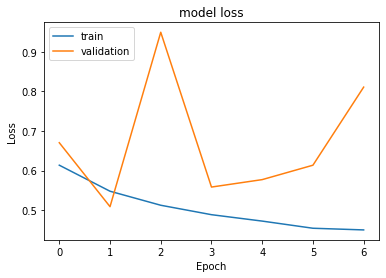

In [163]:
#Plotting Train Loss vs Validation Loss
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.271434, G-Mean=0.738


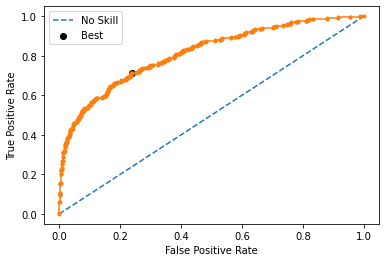

In [164]:
# predict probabilities
yhat9 = model9.predict(X_val)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_val, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [165]:
#Predicting the results using best as a threshold
y_pred_e9=model9.predict(X_val)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

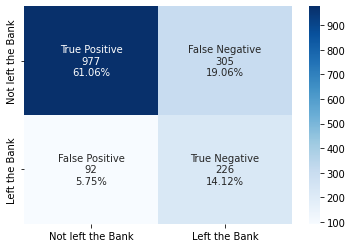

In [166]:
#Calculating the confusion matrix 
cm9=confusion_matrix(y_val, y_pred_e9)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not left the Bank','Left the Bank']
make_confusion_matrix(cm9, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [167]:
#Accuracy as per the classification report 
cr=metrics.classification_report(y_val,y_pred_e9)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1282
           1       0.43      0.71      0.53       318

    accuracy                           0.75      1600
   macro avg       0.67      0.74      0.68      1600
weighted avg       0.82      0.75      0.77      1600



## **Model 10**
**Grid Search CV + SMOTE**

In [168]:
backend.clear_session()
np.random.seed(120)
import random
random.seed(120)
tf.random.set_seed(120)

In [169]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [170]:
print(X_train.shape)
print(y_train.shape)
print(X_sm.shape)
print(y_sm.shape)

(6400, 11)
(6400, 1)
(10158, 11)
(10158, 1)


In [171]:
def create_model_v10(lr,batch_size):
    #np.random.seed(120)
    model = Sequential()
    model.add(Dense(256, activation = 'relu', kernel_initializer='he_uniform', input_dim = 11))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))


    model.add(Dense(1, activation='sigmoid'))


    #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
    optimizer = tf.keras.optimizers.Adam(lr)
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [172]:
keras_estimator = KerasClassifier(build_fn=create_model_v10, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [173]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid= GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
160/160 [==============================] - 2s 7ms/step - loss: 0.5831 - accuracy: 0.7785 - val_loss: 0.4855 - val_accuracy: 0.7945


In [174]:
#Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.793594 using {'batch_size': 32, 'lr': 0.01}


In [175]:
model10=create_model_v10(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

model10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               3072      
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)               

In [176]:
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
model10.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history10=model10.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2, callbacks=es_cb)

Epoch 1/50
254/254 [==============================] - 3s 7ms/step - loss: 0.6908 - accuracy: 0.6115 - val_loss: 1.0547 - val_accuracy: 0.0812
Epoch 2/50
254/254 [==============================] - 1s 6ms/step - loss: 0.6052 - accuracy: 0.6786 - val_loss: 0.6234 - val_accuracy: 0.7283
Epoch 3/50
254/254 [==============================] - 1s 6ms/step - loss: 0.5545 - accuracy: 0.7236 - val_loss: 0.6380 - val_accuracy: 0.6501
Epoch 4/50
254/254 [==============================] - 1s 5ms/step - loss: 0.5178 - accuracy: 0.7545 - val_loss: 0.6077 - val_accuracy: 0.7106
Epoch 5/50
254/254 [==============================] - 1s 6ms/step - loss: 0.5042 - accuracy: 0.7520 - val_loss: 0.7895 - val_accuracy: 0.4769
Epoch 6/50
254/254 [==============================] - 1s 6ms/step - loss: 0.4940 - accuracy: 0.7636 - val_loss: 0.7836 - val_accuracy: 0.4793
Epoch 7/50
254/254 [==============================] - 1s 6ms/step - loss: 0.5007 - accuracy: 0.7634 - val_loss: 0.7031 - val_accuracy: 0.5679
Epoch 

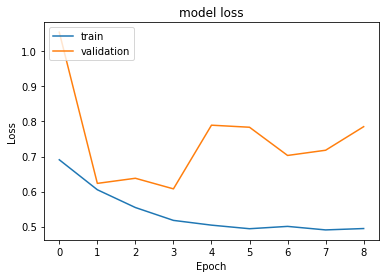

In [177]:
#Plotting Train Loss vs Validation Loss
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.315149, G-Mean=0.777


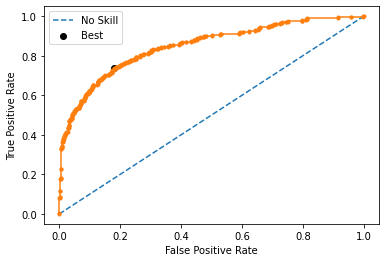

In [178]:
# predict probabilities
yhat10 = model10.predict(X_val)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_val, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [179]:
#Predicting the results using best as a threshold
y_pred_e10=model10.predict(X_val)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

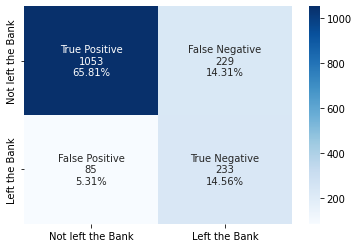

In [180]:
#Calculating the confusion matrix 
cm10=confusion_matrix(y_val, y_pred_e10)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not left the Bank','Left the Bank']
make_confusion_matrix(cm10, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [181]:
#Accuracy as per the classification report 
cr=metrics.classification_report(y_val,y_pred_e10)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1282
           1       0.50      0.73      0.60       318

    accuracy                           0.80      1600
   macro avg       0.71      0.78      0.73      1600
weighted avg       0.84      0.80      0.82      1600



## **Prediction on Test dataset**

In [182]:
#Predicting the results using best as a threshold
y_pred_test=model2_1.predict(X_test)
y_pred_test = (y_pred_test > thresholds2_1[ix])
y_pred_test

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

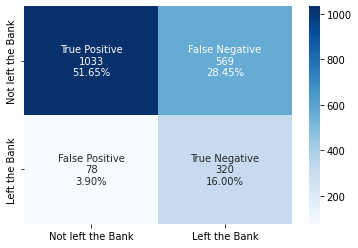

In [183]:
#Calculating the confusion matrix 
cm_test=confusion_matrix(y_test, y_pred_test)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not left the Bank','Left the Bank']
make_confusion_matrix(cm_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [184]:
#Accuracy as per the classification report 
cr=metrics.classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1602
           1       0.36      0.80      0.50       398

    accuracy                           0.68      2000
   macro avg       0.64      0.72      0.63      2000
weighted avg       0.82      0.68      0.71      2000



## **Conclusion**

All the recall score are discussed for class 1 in the following items. 

* Model 1: A simple model is generated and then ROC-AUC curve is used to find the optimum thershold value. Finally, the Recall score was 72%.

* Model 2: The number of hidden layers and nodes are increased wrt Model 1 and the optimizer changed from SGD to Adam. The recall score decresed to 70% and obviously the model is overfitted. 

* Model 2-1: This model is the same as model2, but early stopping threshold is defined. The recall score was jumped to 83%. 

* Model 3: Batch normalization technique applied on model2-1 and the recall score is changed to 70%. 

* Model 4: Drop out technique added to the model. The recall score was 76% for this model. 

* Model 5: In model 5, random grid search technique was used to find the best hyperparameters. The recall score jumpped to 78%. 

* Model 6: In model 6, complete grid search technique is used to obtain the optimal hyperparameters . The recall score was the same as random search, 78%. 

* Model 7: Hyperparameter tunning using Dask library tend to have 79% in recall score. On big dataset, the difference between grid search methods are more clear. 

* Model 8: Keras tuner is used in this model to find the optimal layer number and nodes number per layer. The recal score decreased to 71% using this method. 

* Model 9: In model 9, as the data was unbalanced, the SMOTE used to balance the data. Besides, keras tuner used to find the optimal number of layers and nodes in balanced dataset. The recall score did not change respect to model 8 and remained 71%. 

* Model 10: In model 10, grid search was used on balanced dataset. The recall score changed to 73%. 

* Because of the highest recall score, mode2-1 is selected as the final model. 

* On the test data, the recall score obtained 80% using model2-1 as final model. 

## **Recommendations**

* Although model2 is selected as the final model, but it should be mentioned the precision score is low. It is recommneded to work on the model to improve the precision score too. 

* In EDA, it is mentioned that all the customers which purchased 4 products, left the bank. This point should be investigated what is the problem. 
